### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Se calcula el **Ingreso total**, el **Costo de envio** y se obtiene la diferencia resultando el **Ingreso neto** de cada tienda.

In [ ]:
ingreso_total_tienda_1 = sum(tienda.Precio)
costo_envio_tienda_1 = sum(tienda['Costo de envío'])
Ingreso_Neto_tienda_1 = ingreso_total_tienda_1 - costo_envio_tienda_1

ingreso_total_tienda_2 = sum(tienda2.Precio)
costo_envio_tienda_2 = sum(tienda2['Costo de envío'])
Ingreso_Neto_tienda_2 = ingreso_total_tienda_2 - costo_envio_tienda_2

ingreso_total_tienda_3 = sum(tienda3.Precio)
costo_envio_tienda_3 = sum(tienda3['Costo de envío'])
Ingreso_Neto_tienda_3 = ingreso_total_tienda_3 - costo_envio_tienda_3

ingreso_total_tienda_4 = sum(tienda4.Precio)
costo_envio_tienda_4 = sum(tienda4['Costo de envío'])
Ingreso_Neto_tienda_4 = ingreso_total_tienda_4 - costo_envio_tienda_4


Se genera el reporte de los **Ingresos Netos Por Tienda**

In [ ]:
print('\033[1m             Reporte de los Ingresos Netos Por Tienda.\033[0m\n')
print('             Ingreso          Costo de Envio          Ingreso Neto\n')
print(f'Tienda 1: {ingreso_total_tienda_1}          {costo_envio_tienda_1}            {Ingreso_Neto_tienda_1}')
print(f'Tienda 2: {ingreso_total_tienda_2}          {costo_envio_tienda_2}            {Ingreso_Neto_tienda_2}')
print(f'Tienda 3: {ingreso_total_tienda_3}          {costo_envio_tienda_3}            {Ingreso_Neto_tienda_3}')
print(f'\033[1mTienda 4: {ingreso_total_tienda_4}          {costo_envio_tienda_4}             {Ingreso_Neto_tienda_4}\033[0m')

             Reporte de los Ingresos Netos Por Tienda.

             Ingreso          Costo de Envio          Ingreso Neto

Tienda 1: 1150880400.0          61377900.0            1089502500.0
Tienda 2: 1116343500.0          59485100.0            1056858400.0
Tienda 3: 1098019600.0          58516600.0            1039503000.0
Tienda 4: 1038375700.0          55317400.0             983058300.0


Se comparan los **Ingreso netos** de las 4 tiendas y se determina que la tienda con menores **Ingresos netos** es la tienda **4**.

Se genera la grafica de los **Ingresos Por Tienda en Miles de Millones**

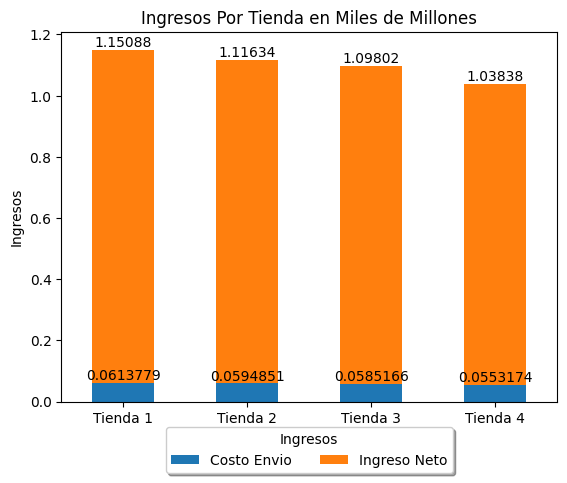

In [ ]:
import matplotlib.pyplot as plt
# Para mostrar los datos en Miles de Millones
mm=1000000000

data = pd.DataFrame({'Tiendas': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
                     'Costo Envio': [costo_envio_tienda_1/mm, costo_envio_tienda_2/mm, costo_envio_tienda_3/mm, costo_envio_tienda_4/mm],
                     'Ingreso Neto': [Ingreso_Neto_tienda_1/mm, Ingreso_Neto_tienda_2/mm, Ingreso_Neto_tienda_3/mm, Ingreso_Neto_tienda_4/mm]})

data.plot.bar(x='Tiendas', y=['Costo Envio', 'Ingreso Neto'], stacked=True, title='Ingresos Por Tienda en Miles de Millones')
#plt.xlabel('Tiendas', labelrotation=0)
plt.ylabel('Ingresos')

ax = plt.subplot(111)
ax.tick_params(axis='x', which='major', direction='out', labelrotation=0)

# Colocar una leyenda debajo del eje actual
ax.legend(title='Ingresos',loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.show()



# 2. Ventas por categoría

Se crea la función **Ventas_Categorias()** para obtener los productos vendidos en las tiendas agrupados por categoria.

In [ ]:
def Ventas_Categorias(partienda):
  Ventas_Categorias = partienda['Categoría del Producto'].groupby(partienda['Categoría del Producto']).size().reset_index(name='conteo')
  Ventas_Categorias = Ventas_Categorias.sort_values(by='Categoría del Producto')
  return Ventas_Categorias


Se obtienen las ventas por categorías de productos en las 4 tiendas.

In [ ]:
  Ventas_Categorias_Tienda_1=Ventas_Categorias(tienda)
  Ventas_Categorias_Tienda_2=Ventas_Categorias(tienda2)
  Ventas_Categorias_Tienda_3=Ventas_Categorias(tienda3)
  Ventas_Categorias_Tienda_4=Ventas_Categorias(tienda4)

Se genera el reporte de las ventas por categoria de las 4 tiendas ordenados por categoria del producto.

In [ ]:
  categorias=[]
  ventas=[]
  ventas_2=[]
  ventas_3=[]
  ventas_4=[]
  for i in range(len(Ventas_Categorias_Tienda_1)):
    categorias.append(Ventas_Categorias_Tienda_1['Categoría del Producto'][i])
    ventas.append(int(Ventas_Categorias_Tienda_1['conteo'][i]))
    ventas_2.append(int(Ventas_Categorias_Tienda_2['conteo'][i]))
    ventas_3.append(int(Ventas_Categorias_Tienda_3['conteo'][i]))
    ventas_4.append(int(Ventas_Categorias_Tienda_4['conteo'][i]))
  print('\033[1m             Reporte de las ventas por Categorias Por Tienda.\033[0m\n')
  print('Categoría del Producto      Tienda 1     Tienda 2     Tienda 3     Tienda 4')
  for i in range(len(categorias)):
    espacios=30-len(categorias[i])
    text=categorias[i]+' '*espacios+str(ventas[i])+' '*10+str(ventas_2[i])+' '*10+str(ventas_3[i])+' '*10+str(ventas_4[i])
    print(text)


             Reporte de las ventas por Categorias Por Tienda.

Categoría del Producto      Tienda 1     Tienda 2     Tienda 3     Tienda 4
Artículos para el hogar       171          181          177          201
Deportes y diversión          284          275          277          277
Electrodomésticos             312          305          278          254
Electrónicos                  448          422          451          451
Instrumentos musicales        182          224          177          170
Juguetes                      324          313          315          338
Libros                        173          197          185          187
Muebles                       465          442          499          480


Se crea la función **Ventasxcategorias()** para obtener las **etiquetas** y las **ventas** por categiría de productos por tienda.

In [ ]:
def Ventasxcategorias(partienda):
  etiquetas=[]
  Ventas=[]
  for i in range(len(partienda)):
    Ventas.append(int(partienda['conteo'][i]))
    etiquetas.append(partienda['Categoría del Producto'][i])
  return etiquetas, Ventas

Se genera la gráfica para una mejor visualización de la información de las **Ventas por Categorías por Tienda**.

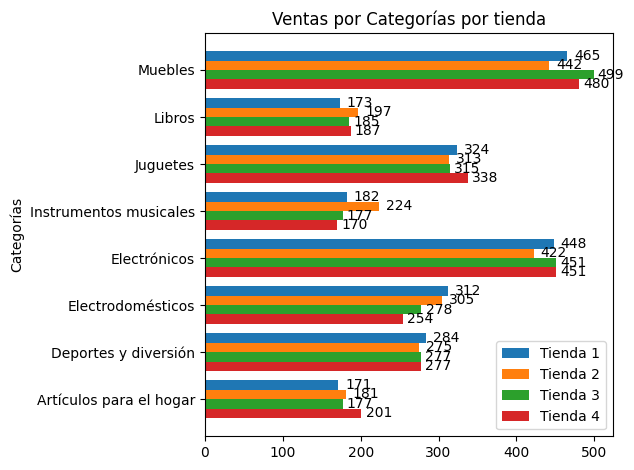

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
etiquetas_T1,ventas_T1=Ventasxcategorias(Ventas_Categorias_Tienda_1)
etiquetas_T2,ventas_T2=Ventasxcategorias(Ventas_Categorias_Tienda_2)
etiquetas_T3,ventas_T3=Ventasxcategorias(Ventas_Categorias_Tienda_3)
etiquetas_T4,ventas_T4=Ventasxcategorias(Ventas_Categorias_Tienda_4)

x = np.arange(len(etiquetas_T1))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.barh(x + width*1.5, ventas_T1, width, label='Tienda 1')
rects2 = ax.barh(x + width/2, ventas_T2, width, label='Tienda 2')
rects3 = ax.barh(x - width/2, ventas_T3, width, label='Tienda 3')
rects4 = ax.barh(x - width*1.5, ventas_T4, width, label='Tienda 4')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Categorías')
ax.set_title('Ventas por Categorías por tienda')
#ax.set_xticks(x, men_means)
ax.set_yticks(x, etiquetas_T1)
ax.legend()

ax.bar_label(rects1, padding=5)
ax.bar_label(rects2, padding=5)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()

plt.show()

# 3. Calificación promedio de la tienda


Se calcula la **Calificación Promedio** de cada tienda.

In [ ]:
Promedio_calificacion_tienda_1 = round(sum(tienda['Calificación'])/len(tienda['Calificación']),2)
Promedio_calificacion_tienda_2 = round(sum(tienda2['Calificación'])/len(tienda2['Calificación']),2)
Promedio_calificacion_tienda_3 = round(sum(tienda3['Calificación'])/len(tienda3['Calificación']),2)
Promedio_calificacion_tienda_4 = round(sum(tienda4['Calificación'])/len(tienda4['Calificación']),2)

Se genera el reporte de la calificación promedio por tienda.

In [ ]:

print('\033[1m  Calificación Promedio por tienda.\033[0m\n')
print(f'Calificación Promedio tienda 1: {Promedio_calificacion_tienda_1}')
print(f'Calificación Promedio tienda 2: {Promedio_calificacion_tienda_2}')
print(f'\033[1mCalificación Promedio tienda 3: {Promedio_calificacion_tienda_3}\033[0m')
print(f'Calificación Promedio tienda 4: {Promedio_calificacion_tienda_4}')

  Calificación Promedio por tienda.

Calificación Promedio tienda 1: 3.98
Calificación Promedio tienda 2: 4.04
Calificación Promedio tienda 3: 4.05
Calificación Promedio tienda 4: 4.0


Se obtiene que la **tienda 3** tiene el mejor promedio de calificación.

# 4. Productos más y menos vendidos

Se crea la función **top_venta_producto()** para obtener los 5 primeros y los 5 últimos productos vendidos de cada tineda.

In [ ]:
def top_venta_producto(partienda):
  Ventas_Producto = partienda['Producto'].value_counts().reset_index(name='conteo')
  Ventas_Producto = Ventas_Producto.rename(columns={'index': 'Producto'})
  producto=[]
  max_min=[]
  compara=Ventas_Producto['conteo'][0]
  for i in range(len(Ventas_Producto)):
    if i < 5 :
      producto.append(Ventas_Producto['Producto'][i])
      max_min.append(int(Ventas_Producto['conteo'][i]))
    elif i > len(Ventas_Producto)-6:
      producto.append(Ventas_Producto['Producto'][i])
      max_min.append(int(Ventas_Producto['conteo'][i]))
  return producto, max_min

Se generan las listas con los 5 productos mas vendidos y los 5 productos menos vendos de las 4 tiendas.

In [ ]:
top_ventas_producto_Tienda_1=top_venta_producto(tienda)
top_ventas_producto_Tienda_2=top_venta_producto(tienda2)
top_ventas_producto_Tienda_3=top_venta_producto(tienda3)
top_ventas_producto_Tienda_4=top_venta_producto(tienda4)


Se genera la función **imprime_top()** para estructurar el reporte del top 5 de los productos mas y menos vwendidos por tienda.

In [ ]:
def imprime_top(paramtienda, titulotienda):
  tamano=[len(paramtienda[0])]
  #len(top_ventas_producto_Tienda_2[0]),len(top_ventas_producto_Tienda_3[0]),len(top_ventas_producto_Tienda_4[0])]
  valor_maximo=max(tamano)
  text=''
  Tienda_texto=titulotienda
  for i in range(int(valor_maximo/2)):
    espacios=30-len(paramtienda[0][i])
    espacios_min=30-len(paramtienda[0][i+5])+3
    text=text+Tienda_texto+' '*5+paramtienda[0][i]+' '*espacios+str(paramtienda[1][i])+'  '*5+paramtienda[0][i+5]+' '*espacios_min+str(paramtienda[1][i+5])+'\n'
  return text


Se genera el reporte del **Top 5** de productos mas y menos vendidos por tienda.

In [ ]:
textt1=imprime_top(top_ventas_producto_Tienda_1,'Tienda 1')
textt2=imprime_top(top_ventas_producto_Tienda_2,'Tienda 2')
textt3=imprime_top(top_ventas_producto_Tienda_3,'Tienda 3')
textt4=imprime_top(top_ventas_producto_Tienda_4,'Tienda 4')

print('\033[1m                Reporte de los 5 productos más y menos vendidos por tienda\033[0m\n')
print("\033[1m" +'Tienda       Productos mas vendido        Total        Productos memos vendido        Total\n'+ "\033[0m")

print(textt1)
print(textt2)
print(textt3)
print(textt4)


                Reporte de los 5 productos más y menos vendidos por tienda

Tienda       Productos mas vendido        Total        Productos memos vendido        Total

Tienda 1     Microondas                    60          Ciencia de datos con Python      39
Tienda 1     TV LED UHD 4K                 60          Pandereta                        36
Tienda 1     Armario                       60          Olla de presión                  35
Tienda 1     Secadora de ropa              58          Auriculares con micrófono        33
Tienda 1     Mesa de noche                 56          Celular ABXY                     33

Tienda 2     Iniciando en programación     65          Auriculares                      37
Tienda 2     Microondas                    62          Sillón                           35
Tienda 2     Batería                       61          Mesa de comedor                  34
Tienda 2     Guitarra acústica             58          Impresora                        34
Tienda 2   

# 5. Envío promedio por tienda

In [ ]:
Promedio_costo_envio_tienda_1=round(sum(tienda['Costo de envío'])/len(tienda['Costo de envío']),2)
Promedio_costo_envio_tienda_2=round(sum(tienda2['Costo de envío'])/len(tienda2['Costo de envío']),2)
Promedio_costo_envio_tienda_3=round(sum(tienda3['Costo de envío'])/len(tienda3['Costo de envío']),2)
Promedio_costo_envio_tienda_4=round(sum(tienda4['Costo de envío'])/len(tienda4['Costo de envío']),2)

Se genera el **Reporte Del Promedio Del Costo Por Envío Por Tienda**.

In [ ]:
print('\033[1mReporte Del Promedio Del Costo Por Envío Por Tienda\033[0m\n')
print(f'          Tienda 1:      {Promedio_costo_envio_tienda_1}')
print(f'          Tienda 2:      {Promedio_costo_envio_tienda_2}')
print(f'          Tienda 3:      {Promedio_costo_envio_tienda_3}')
print(f'          Tienda 4:      {Promedio_costo_envio_tienda_4}')


Reporte Del Promedio Del Costo Por Envío Por Tienda

          Tienda 1:      26018.61
          Tienda 2:      25216.24
          Tienda 3:      24805.68
          Tienda 4:      23459.46


Se genera la gráfica de la información del **Promedio del Costo de Envio por Tienda**.

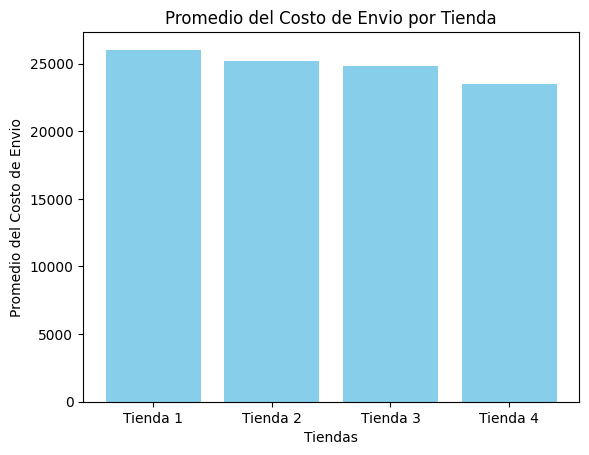

In [ ]:
import matplotlib.pyplot as plt

Tiendas= ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
Promedio_Costo_Envio= [Promedio_costo_envio_tienda_1, Promedio_costo_envio_tienda_2, Promedio_costo_envio_tienda_3, Promedio_costo_envio_tienda_4]
plt.bar(Tiendas, Promedio_Costo_Envio, color='skyblue')
plt.xlabel('Tiendas')
plt.ylabel('Promedio del Costo de Envio')
plt.title('Promedio del Costo de Envio por Tienda')

plt.show()


# Conclusión

El análisis de la facturación de las cuatro tiendas nos muestra que la **tienda 1** tiene el mayor **Ingreso Neto**, el **Promedio del Costo de Envio por Tienda** más alto y la **Calificación Promedio por Tienda** más baja, **la tienda 4** tiene el menor **Ingreso Neto**, el **Promedio del Costo de Envio por Tienda** más bajo y la segunda **Calificación Promedio por Tienda** más baja, las **Tiendas 2, 3** se mantienen en una media entre las otras dos tiendas. Derivado de los puntos anteriores las **tienda 3 y 4** tienen una mejor ubicación.
En recomendación al señor Juan se le pediría esperar uno o dos periodos de tiempo más para verificar bien las tendencias y asi tomar una mejor decisión.